## Notebook for data processing
#### (includes data processing for both dog and human datasets)

##### imports

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import hashlib
import statistics

## data preprocessing for human face dataset

##### data preperation 1

In [4]:
#do the Human Folder from the Kaggle download in this directory
start_dir="../human_process_results/data/Humans"

find_duplicates

In [ ]:
def find_duplicates(dir):
    # store hashes
    hashes = {}

    # Iterate through all images in the directory
    for filename in os.listdir(dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            filepath = os.path.join(dir, filename)
            
            # Open image and convert to hash
            with Image.open(filepath) as img:
                tmp_img = img.resize((10, 10), Image.ANTIALIAS)
                hash = hashlib.sha1(tmp_img.tobytes()).hexdigest()
            
            # If the hash already exists, the file will be deleted
            if hash in hashes:
                os.remove(filepath)
                print(f'delete: {filepath}')
            else:
                hashes[hash] = filepath

find_duplicates(start_dir)


#### delete grayscale images

simple method with color channels

In [ ]:

for filename in os.listdir(start_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith(".jpeg"):
        img_path = os.path.join(start_dir, filename)
        img = Image.open(img_path)
        if len(img.getbands()) == 1:  # if the image is grayscale, it will have only one color channel
            print(f"Deleting grayscale image: {img_path}")
            img.close()  # close the image file before deleting it
            os.remove(img_path)


slow method with RGB values

In [ ]:
def is_greyscale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b: 
                return False
    return True

# Iterate over all files in the directory
for filename in os.listdir(start_dir):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        image_path = os.path.join(start_dir, filename)
        if is_greyscale(image_path):
            print("The picture", filename, "is black and white.")
            os.remove(image_path)

#### data distribution insights

Height and width

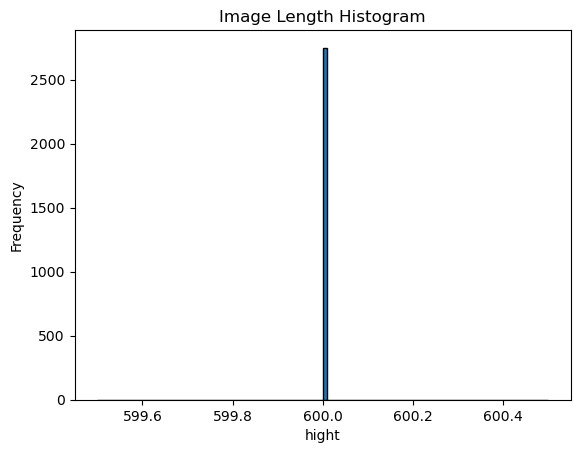

The most common aspect ratio is: 600


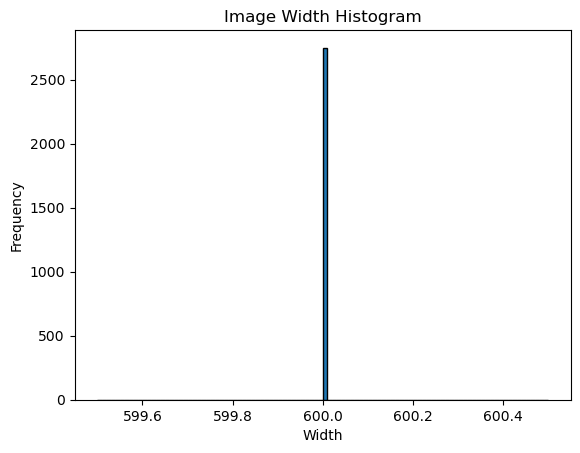

The most common aspect ratio is: 600


In [13]:
folder_path=start_dir
def get_image_dimensions(folder_path):
    image_dimensions = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            filepath = os.path.join(folder_path, filename)
            with Image.open(filepath) as img:
                width, height = img.size
                image_dimensions.append((width, height))
    return image_dimensions

def create_histogram(data, title, xlabel, ylabel, direction): 
    values = [item[direction] for item in data]  # direction 0= witht and 1= hight
    plt.hist(values, bins=100, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    most_common_ratio = statistics.mode(values)
    print(f"The most common aspect ratio is: {most_common_ratio}")

image_dimensions = get_image_dimensions(folder_path)

create_histogram(image_dimensions, "Image Length Histogram", "hight", "Frequency",1)
create_histogram(image_dimensions, "Image Width Histogram", "Width", "Frequency",0)


aspect ratios

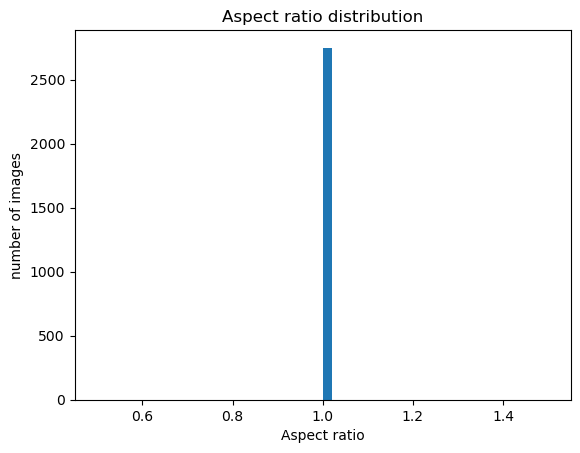

The most common aspect ratio is: 1.0


In [14]:
# Define directory path
dir_path = start_dir

# Empty list for aspect ratios
aspect_ratios = []

# Go through all the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith(".jpeg"):
        # Open the picture and get its dimensions
        img = Image.open(os.path.join(dir_path, filename))
        width, height = img.size

        # Calculate the aspect ratio and add it to the list
        aspect_ratios.append(width / height)

# Create a histogram of the aspect ratios
plt.hist(aspect_ratios, bins=50)
plt.title('Aspect ratio distribution')
plt.xlabel('Aspect ratio')
plt.ylabel('number of images')
plt.show()

# Find and print the most common aspect ratio
most_common_ratio = statistics.mode(aspect_ratios)
print(f"The most common aspect ratio is: {most_common_ratio}")

#### data peperation

Desired output size parameters

In [5]:
#parameter
hoch=600 #height
breit=600 #width

throwing away small images under defined threshold

In [11]:
# Path to directory
dir_path = start_dir

path_list=[]
for filename in os.listdir(dir_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        img_path = os.path.join(dir_path, filename)
        # Open the picture and get its dimensions
        with Image.open(img_path) as img:
            width, height = img.size

            #### Specify threshold again here!!!!!!!! ###
            # If the dimensions are smaller than requested, delete the file
            if width < breit or height < hoch:
                path_list.append(img_path)
                print(f"File {filename} delete")

for path in path_list:
    os.remove(path)

resizing of images to the same size with cutting equaly at the sides and at the bottom

In [10]:
dir_path=start_dir
for filename in os.listdir(dir_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        img_path = os.path.join(dir_path, filename)
        # Open the picture and get its dimensions
        with Image.open(img_path) as img:
            width, height = img.size
            if width != height:
                # Determine the size of the square crop
                size = min(width, height)

                # If the image is wider than it is tall, crop equally from left and right
                if width > height:
                    left = (width - size)/2
                    right = left + height
                    top = 0
                    bottom = size
                # If the image is taller than it is wide, crop from the bottom
                elif width < height:
                    left = 0
                    right = width
                    top = 0
                    bottom = width

                img_cropped = img.crop((left, top, right, bottom))
                # Save the cropped image, overwriting the original
                img_cropped.save(img_path)
                print(f"File {filename} was cropped.")

File 1 (22).jpeg was cropped.
File 1 (25).jpeg was cropped.
File 1 (27).jpeg was cropped.
File 1 (28).jpeg was cropped.
File 1 (29).jpeg was cropped.
File 1 (34).jpeg was cropped.
File 1 (35).jpeg was cropped.


resizing of images to the same size with bicubic downscaling

In [12]:
dir_path=start_dir
for filename in os.listdir(dir_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        img_path = os.path.join(dir_path, filename)
        # Open the picture
        with Image.open(img_path) as img:
            # Resize the image using bicubic interpolation
            img_resized = img.resize((hoch,breit), Image.BICUBIC)
            # Save the resized image, overwriting the original
            img_resized.save(img_path)
            print(f"File {filename} was scaled and overwritten.")

File 1 (1).jpeg was scaled and overwritten.
File 1 (10).jpeg was scaled and overwritten.
File 1 (10).jpg was scaled and overwritten.
File 1 (10).png was scaled and overwritten.
File 1 (1001).jpg was scaled and overwritten.
File 1 (1003).jpg was scaled and overwritten.
File 1 (1005).jpg was scaled and overwritten.
File 1 (1006).jpg was scaled and overwritten.
File 1 (1007).jpg was scaled and overwritten.
File 1 (101).jpg was scaled and overwritten.
File 1 (101).png was scaled and overwritten.
File 1 (1010).jpg was scaled and overwritten.
File 1 (1011).jpg was scaled and overwritten.
File 1 (1012).jpg was scaled and overwritten.
File 1 (1013).jpg was scaled and overwritten.
File 1 (1015).jpg was scaled and overwritten.
File 1 (1016).jpg was scaled and overwritten.
File 1 (1018).jpg was scaled and overwritten.
File 1 (1019).jpg was scaled and overwritten.
File 1 (1020).jpg was scaled and overwritten.
File 1 (1023).jpg was scaled and overwritten.
File 1 (1024).jpg was scaled and overwritte

#### splitting human data into train / test and downscaling

In [1]:
# Output size for downsampling (by a factor of 3)
output_size = (200, 200)

def downsample_image(image_path, output_size):
    # Open the image
    image = Image.open(image_path)

    # Perform downsampling using bicubic interpolation
    downscaled_image = image.resize(output_size, resample=Image.BICUBIC)

    return downscaled_image

# Folder path containing the images
folder_path = f"../human_process_results/data/Humans"

# Defining folder for downscaled images serving for input for modelling (&upscaling)
output_folder_path = f"../human_process_results/data/Humans_final_{output_size[1]}"

test_low_res_folder = f"../human_process_results/data/Humans_final_{output_size[1]}_test"
test_original = f"../human_process_results/data/Humans_final_{hoch}_test"

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
if not os.path.exists(test_low_res_folder):
    os.makedirs(test_low_res_folder)
if not os.path.exists(test_original):
    os.makedirs(test_original)

number_images = len(os.listdir(folder_path))

# Iterate over the files in the folder
for number, filename in enumerate(os.listdir(folder_path)):

    # Check if the file is an image (optional)
    if number<=0.8*number_images:
      # Construct the full path to the image file
      image_path = os.path.join(folder_path, filename)

      # Apply downsampling to the image
      downsampled_image = downsample_image(image_path, output_size)

      # Save the downscaled image
      output_filename = f"downsampled_{filename}"
      output_path = os.path.join(output_folder_path, output_filename)
      downsampled_image.save(output_path)

    else:
      # Construct the full path to the image file
      image_path = os.path.join(folder_path, filename)

      image = Image.open(image_path)
      image.save(os.path.join(test_original, filename))


      # Apply downsampling to the image
      downsampled_image = downsample_image(image_path, output_size)

      # Save the downscaled image
      output_filename = f"downsampled_{filename}"
      output_path = os.path.join(test_low_res_folder, output_filename)
      downsampled_image.save(output_path)

      os.remove(os.path.join(folder_path, filename))


## dog dataset processing

Info: the dog datasets we use is split into train and test data by default (validation split is done via model training later and not saved to disk into seperate folders), same size and all RGB. So preprocessing is just creating the low resolution data for model input.

creating low resolution input dataset for training

In [ ]:
def downsample_image(image_path, output_size):
    # Open the image
    image = Image.open(image_path)

    # Perform downsampling using bicubic interpolation
    downscaled_image = image.resize(output_size, resample=Image.BICUBIC)

    return downscaled_image

# Folder path containing the images
folder_path = "/kaggle/input/animal-faces/afhq/train/dog"

# Defining folder for downscaled images serving for input for modelling (&upscaling)
output_folder_path = "/kaggle/working/dog_low_res"
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)


# Output size for downsampling (by a factor of 3)
output_size = (128, 128)

# Iterate over the files in the folder
for number, filename in enumerate(os.listdir(folder_path)):

  # Construct the full path to the image file
  image_path = os.path.join(folder_path, filename)

  # Apply downsampling to the image
  downsampled_image = downsample_image(image_path, output_size)

  # Save the downscaled image
  output_filename = f"downsampled_{filename}"
  output_path = os.path.join(output_folder_path, output_filename)
  downsampled_image.save(output_path)
